In [1]:

import numpy as np 
import matplotlib.pyplot as plt
from tqdm import tqdm, trange
import seaborn as sns
import random


In [2]:
class CFG:
    action_Left = -1
    action_Right = 1
    state_Left = 0
    state_Right = 3
    actions = [[],np.arange(10),[action_Left, action_Right],[]]
    epsilon = 0.1
    episode = 300
    alpha = 0.1
    garma = 1.0
    n_run = 10000

In [3]:
def QLearning(Q):
    res = np.zeros((CFG.episode))
    for ep in range(CFG.episode):
        cur = 2
        while(cur != CFG.state_Left and cur!= CFG.state_Right):
            if (cur == 1):
                if (np.random.random()<CFG.epsilon):
                    action = np.random.choice(range(10))
                else:
                    action = np.random.choice([action_ for action_, value_ in enumerate(Q[cur]) if value_ == np.max(Q[cur])])
                Next = 0
                reward = np.random.normal(-0.1, 1)
                target = np.max(Q[Next])
                Q[cur][action] += CFG.alpha * (reward + CFG.garma * target - Q[cur][action])
                break
                    
            if (np.random.random()<CFG.epsilon):
                action = np.random.choice(range(2))
            else:
                action = np.random.choice([action_ for action_, value_ in enumerate(Q[cur]) if value_ == np.max(Q[cur])])
            Next = cur + CFG.actions[cur][action]
            reward = 0
#             print(Next)
            target = np.max(Q[Next])
            if (cur == 2 and CFG.actions[cur][action] == CFG.action_Left):
                res[ep] += 1
            Q[cur][action] += CFG.alpha * (reward + CFG.garma * target - Q[cur][action])
            cur = Next
    return res

In [4]:
def DoubleQLearning(Q1, Q2):
    res = np.zeros((CFG.episode))
    for ep in range(CFG.episode):
        cur = 2
        while(cur != CFG.state_Left and cur!= CFG.state_Right):
            if (cur == 1):
                if (np.random.random()<CFG.epsilon):
                    action = np.random.choice(range(10))
                else:
                    action1 = np.random.choice([action_ for action_, value_ in enumerate(Q1[cur]) if value_ == np.max(Q1[cur])])
                    action2 = np.random.choice([action_ for action_, value_ in enumerate(Q2[cur]) if value_ == np.max(Q2[cur])])
                    action = np.random.choice([action1, action2])
                Next = 0
                reward = np.random.normal(-0.1, 1)
                
                if np.random.binomial(1, 0.5) == 1:
                    UQ = Q1
                    TQ = Q2
                else:
                    UQ = Q2
                    TQ = Q1
                target = TQ[Next][np.argmax(UQ[Next])]
                UQ[cur][action] += CFG.alpha * (reward + CFG.garma * target - UQ[cur][action])
                break
           # --------------------------------------------------------------
            if (np.random.random()<CFG.epsilon):
                action = np.random.choice(range(2))
            else:
                action1 = np.random.choice([action_ for action_, value_ in enumerate(Q1[cur]) if value_ == np.max(Q1[cur])])
                action2 = np.random.choice([action_ for action_, value_ in enumerate(Q2[cur]) if value_ == np.max(Q2[cur])])
                action = np.random.choice([action1,action2])
                
            Next = cur + CFG.actions[cur][action]
            reward = 0
            if (cur == 2 and CFG.actions[cur][action] == CFG.action_Left):
                res[ep] += 1
            
            if np.random.binomial(1, 0.5) == 1:
                UQ = Q1
                TQ = Q2
            else:
                UQ = Q2
                TQ = Q1
            target = TQ[Next][np.argmax(UQ[Next])]
            UQ[cur][action] += CFG.alpha * (reward + CFG.garma * target - UQ[cur][action])
            cur = Next
    return res

In [5]:
res_QLearning = np.zeros((CFG.episode), dtype = float)
res_DoubleQLearning = np.zeros((CFG.episode), dtype = float)
for r in trange(CFG.n_run):
    Q_QLearning = [np.zeros((1)),np.zeros((10)),np.zeros((2)),np.zeros((1))]
    Q_DoubleQLearning_1 = [np.zeros((1)),np.zeros((10)),np.zeros((2)),np.zeros((1))]
    Q_DoubleQLearning_2 = [np.zeros((1)),np.zeros((10)),np.zeros((2)),np.zeros((1))]
    res_QLearning += QLearning(Q_QLearning)
    res_DoubleQLearning += DoubleQLearning(Q_DoubleQLearning_1, Q_DoubleQLearning_2)
res_QLearning /= CFG.n_run
res_DoubleQLearning /= CFG.n_run

100%|██████████| 10000/10000 [08:34<00:00, 19.43it/s]


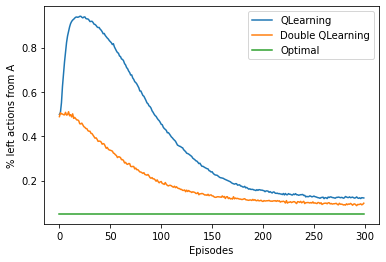

In [6]:
plt.plot(res_QLearning, label = 'QLearning')
plt.plot(res_DoubleQLearning, label = 'Double QLearning')
plt.plot(np.ones((CFG.episode))*0.05, label = 'Optimal')
plt.xlabel('Episodes')
plt.ylabel('% left actions from A')
plt.legend()
plt.savefig('figure_Ex_6_7/figure_Ex_6_7.png')
plt.show()